In [1]:
import numpy as np
N=6    #Seis variables de entrada
M=1    #una variables de salida
P=1000 #mil datos de entrenamiento

In [2]:
m=np.random.uniform(-1,1,(N+1,M))  #Me genero los datos de entrada 
#m es la matriz de mezcla y me dice como estan correlacionados mis datos de entrada

In [3]:
x=np.random.uniform(-9,9,(P,N+1))    #variables de entrada
x[:,-1]=1  #toda la ultima columna de x es de valor 1

In [4]:
z=np.sign(np.prod(x,axis=1)).reshape((P,1))   #Me va a quedar una matriz z de dimensiones P*M
                #P son las instancias del probema
                #M son las posibles respuestas del problema
                #la solución general del problema esta dada por los coeficientess de la matriz m
                #agrego la función signo
                
                
#Este caso devuelve un target que no es separable linealmente

In [5]:
Lr=0.1/P   #Learning rate

In [6]:
w=np.random.uniform(-0.1,0.1,(N+1,M))     #Me invento una matriz de parametros (lo que entrno)
                                          #uso valores pequeños inicialmente                                      

In [7]:
E,t=1. , 0      #asignacion multiple
                #E es el error inicial (flotante)
                #t es un contador de epocas
        
E_list = list()
Ep_list = list()
t_list =list()

E_list.append(E)
Ep_list.append(1)  #Error de prueba
t_list.append(t)

In [8]:
                                    #Generamos unos datos de validacion

In [9]:
xp=np.random.uniform(-25,25,(100,N+1))
xp[:-1]=1
zp=np.sign(np.prod(xp,axis=1))  #genero los target de prueba

In [10]:
while E>0.01 and t<9000:   #E, t, Lr y sus cotas son cosas que se obtienen experimentalmente
    y=np.tanh(np.dot(x,w))  #Hago la predicción y con los parametro del modelo con funcion de activacio tanh
    d=z-y
    yp=np.tanh(np.dot(xp,w))  #Hago la prediccion con el modelo entrenado 
    dw=(Lr*np.dot(x.T,d)) 
    w+=dw                     #final de la epoca (le doy todo el conjuto de datos al mismo tiempo)
    E=np.mean(np.square(d))   #actualizo el error (es el promedio de un vector de errores)
    t+=1
    E_list.append(E)
    t_list.append(t)
    Ep_list.append(np.mean(np.square(zp-yp)))
    if t%100==0:
        print(t,E)         #cada cierto tiempo me fijo como va el error  

100 1.3675899292544365
200 1.3675595044963869
300 1.3675594588893465
400 1.3675594588210274
500 1.3675594588209268
600 1.3675594588209268
700 1.3675594588209266
800 1.3675594588209266
900 1.3675594588209266
1000 1.3675594588209266
1100 1.3675594588209266
1200 1.3675594588209266
1300 1.3675594588209266
1400 1.3675594588209266
1500 1.3675594588209266
1600 1.3675594588209266
1700 1.3675594588209268
1800 1.3675594588209266
1900 1.3675594588209266
2000 1.3675594588209266
2100 1.3675594588209266
2200 1.3675594588209268
2300 1.3675594588209266
2400 1.3675594588209266
2500 1.3675594588209268
2600 1.3675594588209266
2700 1.3675594588209266
2800 1.3675594588209266
2900 1.3675594588209266
3000 1.3675594588209266
3100 1.3675594588209266
3200 1.3675594588209268
3300 1.3675594588209266
3400 1.3675594588209266
3500 1.3675594588209266
3600 1.3675594588209268
3700 1.3675594588209266
3800 1.3675594588209266
3900 1.3675594588209266
4000 1.3675594588209268
4100 1.3675594588209266
4200 1.3675594588209266
4

In [11]:
import matplotlib.pyplot as plt

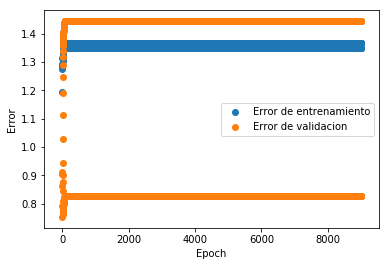

In [12]:
plt.figure(1)
plt.scatter(t_list[1:],E_list[1:],label="Error de entrenamiento")
plt.scatter(t_list[1:],Ep_list[1:],label="Error de validacion")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()

In [13]:
print(w)

[[ 0.00311236]
 [-0.04749899]
 [ 0.0413924 ]
 [ 0.00175777]
 [-0.13791341]
 [ 0.01764797]
 [-0.07542417]]


In [14]:
print(m)

[[-0.61704781]
 [ 0.05732646]
 [-0.17754617]
 [ 0.24177549]
 [ 0.60000976]
 [ 0.30714291]
 [ 0.59815654]]


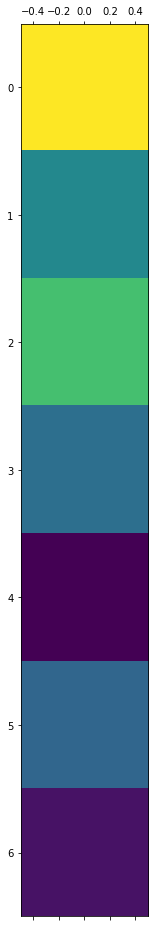

In [15]:
plt.matshow(w-m)   #Al no estar usando un modelo lineal ya no coinciden w y m

In [16]:
c=w[0,0]/m[0,0]
print(c)      #comparando las matrices

-0.005043952429000684


In [17]:
m*c

array([[ 0.00311236],
       [-0.00028915],
       [ 0.00089553],
       [-0.0012195 ],
       [-0.00302642],
       [-0.00154921],
       [-0.00301707]])

In [18]:
w   #Essta similtud es igual

array([[ 0.00311236],
       [-0.04749899],
       [ 0.0413924 ],
       [ 0.00175777],
       [-0.13791341],
       [ 0.01764797],
       [-0.07542417]])

In [19]:
#Otro modelo


In [20]:
M=1
z=np.sign(np.prod(x,axis=1).reshape((P,1)))
zp=np.sign(np.prod(xp,axis=1))